In [14]:
#importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
#importing training dataset for EDA Analysis
servicedataset=pd.read_csv("E:\\Excel R\\Project Servicenow\\train.csv\\train.csv")

In [3]:
#Replacing symbols with Nan values
servicedataset.replace('?',np.nan,inplace=True)

In [4]:
#Calculating missing values
servicedataset.isna().sum()

Unnamed: 0                0
ID                        0
ID_status                 0
active                    0
count_reassign            0
count_opening             0
count_updated             0
ID_caller                22
opened_by              3328
opened_time               0
Created_by            37174
created_at            37174
updated_by                0
updated_at                0
type_contact              0
location                 54
category_ID              56
user_symptom          23139
Support_group          9994
support_incharge      19302
Doc_knowledge             0
confirmation_check        0
impact                    0
notify                    0
problem_ID            97620
change_request        98512
dtype: int64

In [5]:
#Finding different categories under notify and their value count
servicedataset.notify.value_counts()

Do Not Notify    99113
Send Email          85
Name: notify, dtype: int64

In [6]:
#target variable, which is highly imbalanced 
servicedataset.impact.value_counts()

2 - Medium    94034
3 - Low        2720
1 - High       2444
Name: impact, dtype: int64

In [30]:
# comparing who has opened the incident and how it is impacting 
ct=pd.crosstab(index=servicedataset["opened_by"],columns=servicedataset["impact"],dropna=True)

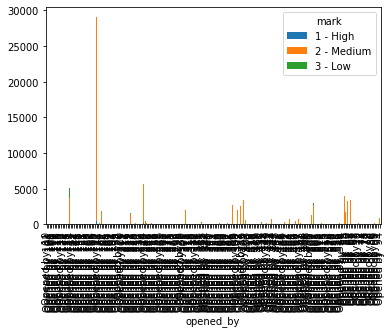

In [15]:
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

In [7]:
#from datetime import datetime

In [25]:
#servicedataset['leapday'] = servicedataset['opentime'].dt.month.eq(2) & servicedataset['opentime'].dt.day.eq(29)

In [30]:
#servicedataset = servicedataset.loc[~(servicedataset['opentime'].dt.month.eq(2) & servicedataset['opentime'].dt.day.eq(29))] 

In [16]:
servicedataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99198 entries, 0 to 99197
Data columns (total 26 columns):
Unnamed: 0            99198 non-null int64
ID                    99198 non-null object
ID_status             99198 non-null object
active                99198 non-null bool
count_reassign        99198 non-null int64
count_opening         99198 non-null int64
count_updated         99198 non-null int64
ID_caller             99176 non-null object
opened_by             95870 non-null object
opened_time           99198 non-null object
Created_by            62024 non-null object
created_at            62024 non-null object
updated_by            99198 non-null object
updated_at            99198 non-null object
type_contact          99198 non-null object
location              99144 non-null object
category_ID           99142 non-null object
user_symptom          76059 non-null object
Support_group         89204 non-null object
support_incharge      79896 non-null object
Doc_knowledge    

In [17]:
# Feature Engineering in order to get information from open time and updating time
servicedataset['opentime'] = pd.to_datetime(servicedataset.opened_time)

In [18]:
servicedataset['updatedat'] = pd.to_datetime(servicedataset.updated_at)

In [19]:
servicedataset['Waitingtime'] = servicedataset['updatedat'] - servicedataset['opentime']

In [20]:
servicedataset['Waitingtime']

0          0 days 00:07:00
1          0 days 10:13:00
2         64 days 10:44:00
3          0 days 00:50:00
4          0 days 00:53:00
5          0 days 06:52:00
6       -57 days +04:34:00
7       -57 days +04:34:00
8         95 days 05:20:00
9          0 days 00:16:00
10         0 days 00:28:00
11         0 days 03:56:00
12      -58 days +20:43:00
13      -58 days +20:45:00
14        94 days 20:50:00
15         0 days 00:04:00
16      -26 days +02:14:00
17      -26 days +05:28:00
18       125 days 06:22:00
19         0 days 00:28:00
20         0 days 00:31:00
21         0 days 00:36:00
22         0 days 04:30:00
23         0 days 08:53:00
24        64 days 09:02:00
25         0 days 00:09:00
26         0 days 00:38:00
27         0 days 00:38:00
28         0 days 08:53:00
29         0 days 08:53:00
               ...        
99168      0 days 00:00:00
99169      0 days 00:00:00
99170      0 days 01:16:00
99171      0 days 03:14:00
99172      0 days 23:04:00
99173      1 days 01:35:00
9

In [21]:
servicedataset['Waitingtime']=servicedataset['Waitingtime']/np.timedelta64(1,'m')

In [22]:
servicedataset['Waitingtime']

0             7.0
1           613.0
2         92804.0
3            50.0
4            53.0
5           412.0
6        -81806.0
7        -81806.0
8        137120.0
9            16.0
10           28.0
11          236.0
12       -82277.0
13       -82275.0
14       136610.0
15            4.0
16       -37306.0
17       -37112.0
18       180382.0
19           28.0
20           31.0
21           36.0
22          270.0
23          533.0
24        92702.0
25            9.0
26           38.0
27           38.0
28          533.0
29          533.0
           ...   
99168         0.0
99169         0.0
99170        76.0
99171       194.0
99172      1384.0
99173      1535.0
99174         0.0
99175         0.0
99176         0.0
99177         0.0
99178         0.0
99179         0.0
99180         0.0
99181         0.0
99182      2805.0
99183      2808.0
99184         0.0
99185         0.0
99186       137.0
99187       175.0
99188       286.0
99189       286.0
99190      1313.0
99191         0.0
99192     

In [23]:
from scipy import stats

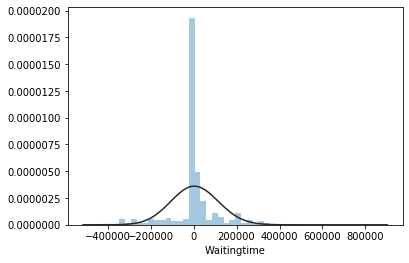

In [24]:
#
sns.distplot(servicedataset.Waitingtime, kde=False, fit=stats.gamma);

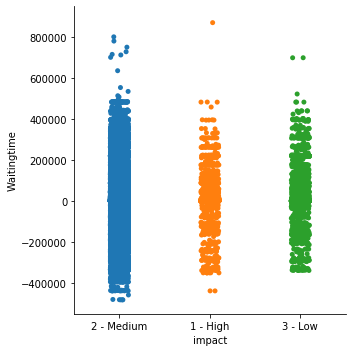

In [26]:
sns.catplot(x="impact", y="Waitingtime", data=servicedataset);

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
servicedataset.ID_status.value_counts()

Active                27075
New                   25515
Resolved              18158
Closed                17387
Awaiting User Info    10235
Awaiting Vendor         493
Awaiting Problem        307
Awaiting Evidence        26
-100                      2
Name: ID_status, dtype: int64

In [34]:
# finding realtion between id status and impact
pd.crosstab(index=servicedataset["ID_status"],columns=servicedataset["impact"])

impact,1 - High,2 - Medium,3 - Low
ID_status,,,
-100,0,2,0
Active,678,25684,713
Awaiting Evidence,4,21,1
Awaiting Problem,22,258,27
Awaiting User Info,171,9717,347
Awaiting Vendor,18,471,4
Closed,283,16578,526
New,868,24055,592
Resolved,400,17248,510


In [11]:
servicedataset.active.value_counts()

True     81810
False    17388
Name: active, dtype: int64

In [36]:
servicedataset.count_reassign.value_counts()

0     48853
1     26027
2     10503
3      5777
4      3244
5      1830
6      1017
7       692
8       406
9       262
10      214
11      130
12       85
13       44
14       36
15       13
20       13
17       11
18       11
16        9
19        7
22        6
26        2
23        2
21        1
24        1
25        1
27        1
Name: count_reassign, dtype: int64

In [35]:
# incidents which got reaassigned once or twice accounts for more than 70% of data
pd.crosstab(index=servicedataset["count_reassign"],columns=servicedataset["impact"])

impact,1 - High,2 - Medium,3 - Low
count_reassign,,,
0,1031,46329,1493
1,684,24726,617
2,318,9934,251
3,148,5483,146
4,78,3084,82
5,55,1727,48
6,44,957,16
7,33,640,19
8,15,380,11


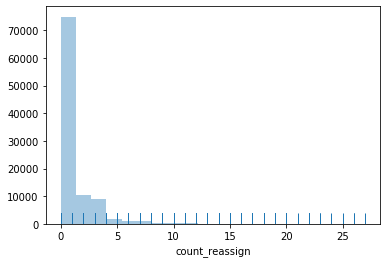

In [37]:
sns.distplot(servicedataset.count_reassign, bins=20, kde=False, rug=True,hist=True);

In [38]:
#maximum number of incidents are still opened
servicedataset.count_opening.value_counts()

0    97571
1     1340
2      134
3       77
4       41
6       14
5       13
7        5
8        3
Name: count_opening, dtype: int64

In [39]:
servicedataset.count_updated.value_counts()

0      17361
1      15502
2      13851
3       9919
4       7546
5       5986
6       4886
7       4062
8       3219
9       2696
10      2135
11      1724
12      1478
13      1144
14       965
15       812
16       671
17       554
18       460
19       419
20       339
21       324
22       267
23       237
24       206
25       170
26       164
27       149
28       129
29       117
       ...  
87         7
86         7
88         5
94         5
83         5
93         5
90         4
89         4
95         4
91         3
96         3
101        3
113        2
115        2
116        2
85         2
92         2
102        1
100        1
103        1
105        1
106        1
99         1
112        1
98         1
114        1
84         1
128        1
117        1
97         1
Name: count_updated, Length: 113, dtype: int64

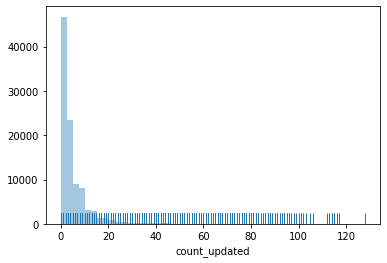

In [40]:
sns.distplot(servicedataset.count_updated,kde=False,rug=True, hist=True);

In [41]:
servicedataset.ID_caller.value_counts()

Caller 1904    1001
Caller 290      552
Caller 4514     496
Caller 1441     218
Caller 298      203
Caller 3763     192
Caller 4414     167
Caller 93       166
Caller 90       158
Caller 2471     155
Caller 1531     153
Caller 3160     151
Caller 5093     149
Caller 3479     149
Caller 363      144
Caller 1270     140
Caller 707      139
Caller 1517     138
Caller 994      136
Caller 3038     134
Caller 3870     133
Caller 501      132
Caller 2079     130
Caller 2737     128
Caller 2630     125
Caller 4642     125
Caller 3986     124
Caller 4288     123
Caller 2522     123
Caller 156      123
               ... 
Caller 2702       1
Caller 4347       1
Caller 4800       1
Caller 195        1
Caller 587        1
Caller 542        1
Caller 482        1
Caller 5552       1
Caller 657        1
Caller 989        1
Caller 4275       1
Caller 1333       1
Caller 3321       1
Caller 3917       1
Caller 2815       1
Caller 1099       1
Caller 2112       1
Caller 1637       1
Caller 4816       1


In [42]:
pd.crosstab(index=servicedataset["ID_caller"], columns=servicedataset["impact"])

impact,1 - High,2 - Medium,3 - Low
ID_caller,,,
Caller 10,0,7,0
Caller 1000,0,3,0
Caller 1001,0,42,0
Caller 1002,0,32,0
Caller 1004,0,2,0
Caller 1005,0,3,0
Caller 1006,0,39,0
Caller 1007,2,28,5
Caller 1008,0,5,0


In [43]:
#accounts opend by 17 shares maximum cases of incidents raised
servicedataset.opened_by.value_counts()

Opened by  17     29027
Opened by  24      5658
Opened by  131     5113
Opened by  108     4234
Opened by  55      3917
Opened by  40      3468
Opened by  62      3345
Opened by  59      3232
Opened by  501     2957
Opened by  8       2910
Opened by  386     2695
Opened by  397     2501
Opened by  301     2282
Opened by  390     2067
Opened by  305     2000
Opened by  180     1888
Opened by  58      1689
Opened by  221     1510
Opened by  500     1356
Opened by  239     1319
Opened by  94       843
Opened by  47       748
Opened by  443      745
Opened by  463      685
Opened by  402      542
Opened by  444      454
Opened by  468      451
Opened by  20       413
Opened by  240      391
Opened by  460      318
                  ...  
Opened by  419        5
Opened by  435        5
Opened by  429        4
Opened by  26         4
Opened by  166        4
Opened by  406        4
Opened by  275        4
Opened by  230        4
Opened by  515        4
Opened by  313        4
Opened by  74   

In [44]:
openedimpact=pd.crosstab(index=servicedataset["opened_by"], columns=servicedataset["impact"])

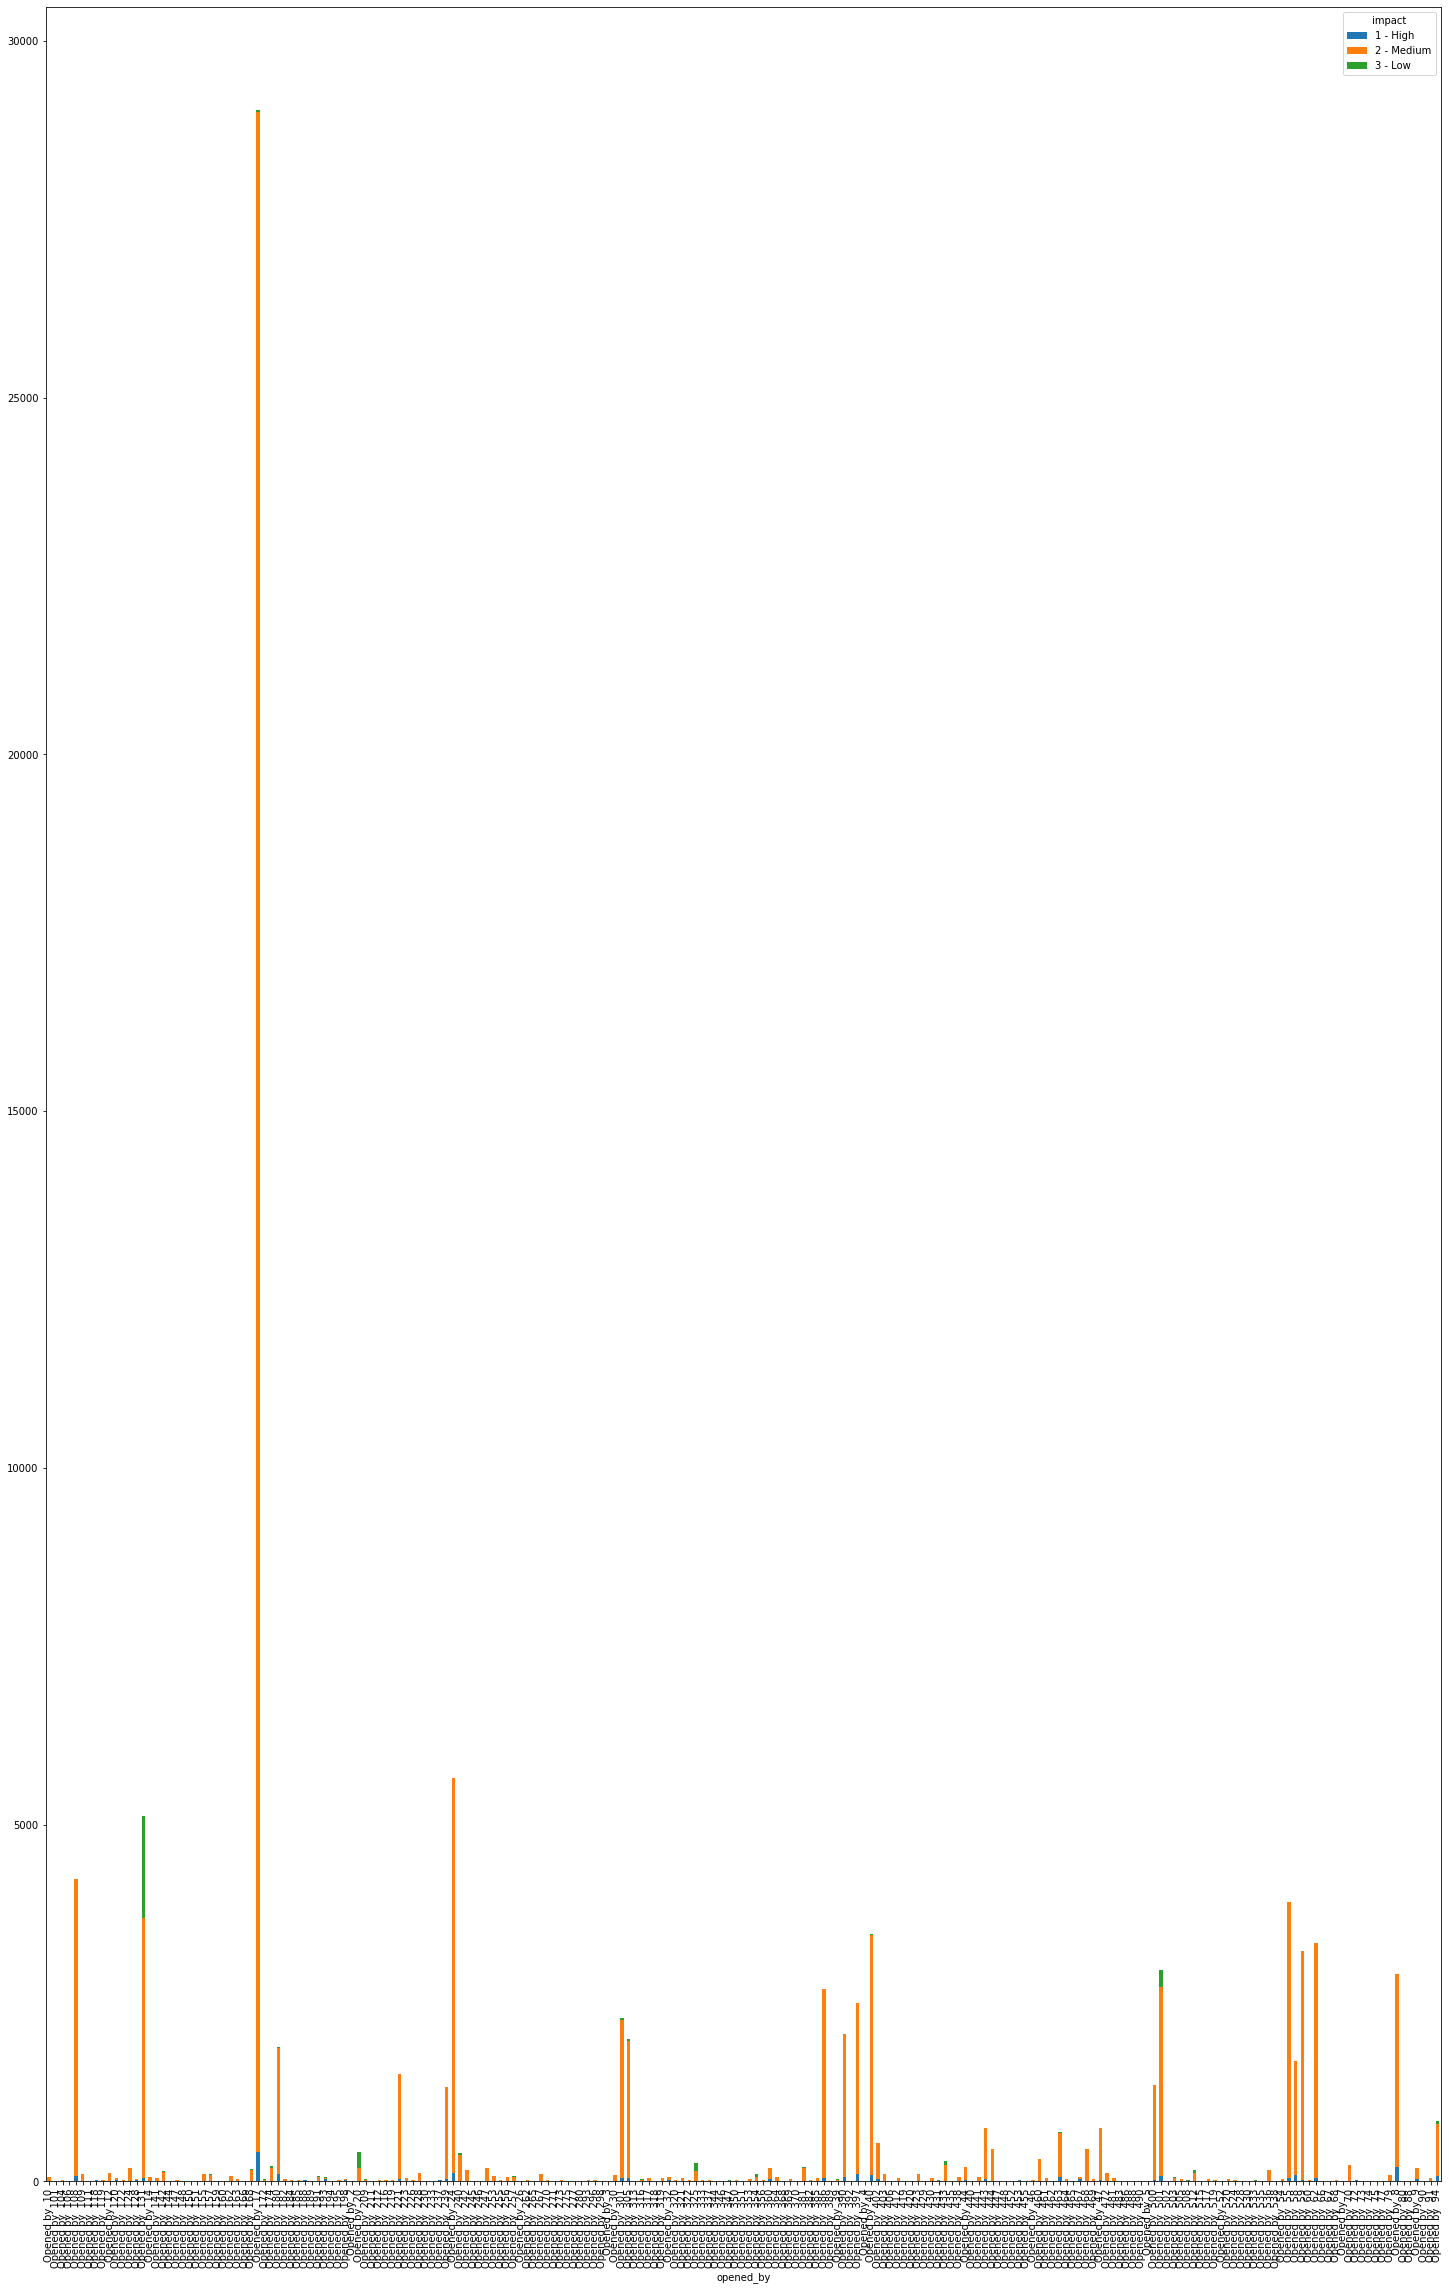

In [45]:
openedimpact.plot(kind="bar", 
                 figsize=(25,40),
                 stacked=True)

In [25]:
servicedataset.updated_by.value_counts()

Updated by 908    25190
Updated by 44      8845
Updated by 60      4951
Updated by 429     2918
Updated by 859     1760
Updated by 135     1636
Updated by 131     1546
Updated by 265     1542
Updated by 241     1341
Updated by 133     1324
Updated by 573     1308
Updated by 213     1298
Updated by 129     1216
Updated by 467     1133
Updated by 915     1095
Updated by 21      1081
Updated by 214     1022
Updated by 578      983
Updated by 340      938
Updated by 332      923
Updated by 833      913
Updated by 723      909
Updated by 874      878
Updated by 307      841
Updated by 533      837
Updated by 974      809
Updated by 748      807
Updated by 88       783
Updated by 928      780
Updated by 746      755
                  ...  
Updated by 290        1
Updated by 654        1
Updated by 1          1
Updated by 897        1
Updated by 650        1
Updated by 32         1
Updated by 895        1
Updated by 850        1
Updated by 403        1
Updated by 7          1
Updated by 159  

In [46]:
updatedimpact=pd.crosstab(index=servicedataset["updated_by"],columns=servicedataset["impact"])

In [47]:
updatedimpact

impact,1 - High,2 - Medium,3 - Low
updated_by,,,
Updated by 1,0,1,0
Updated by 10,0,1,0
Updated by 100,0,3,0
Updated by 101,0,2,0
Updated by 102,0,3,0
Updated by 103,0,3,0
Updated by 107,0,1,0
Updated by 108,0,3,0
Updated by 109,7,700,8


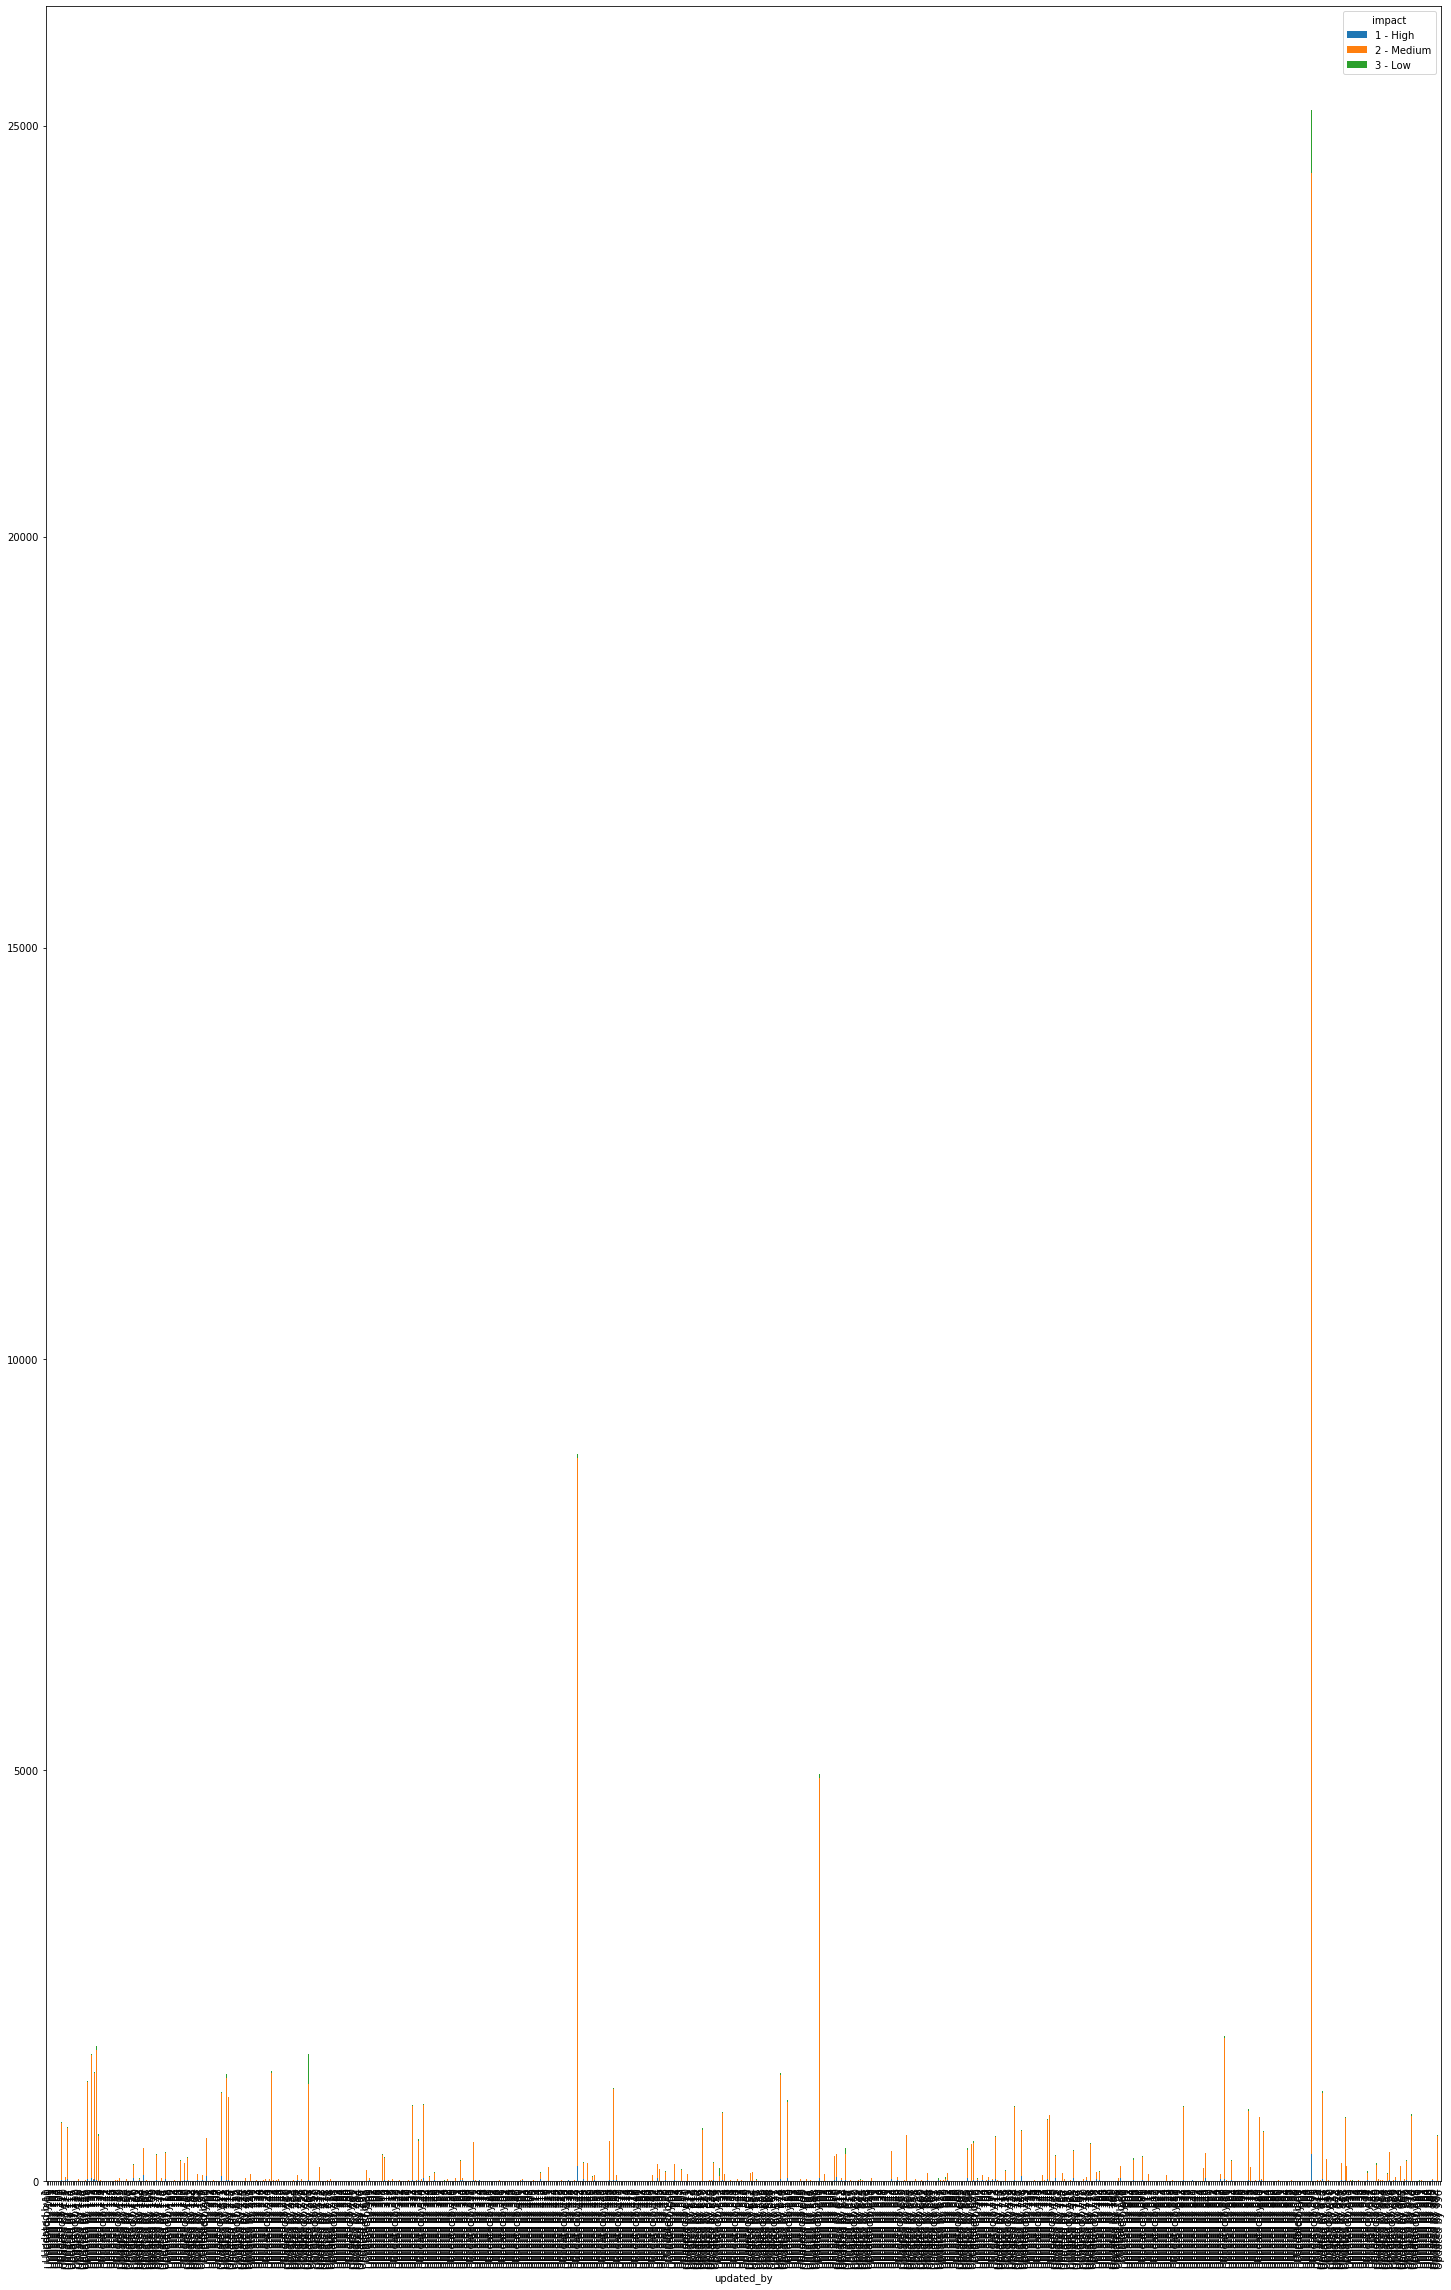

In [48]:
# Difficult to analyse all who has updated and impact of the incident
updatedimpact.plot(kind="bar", 
                 figsize=(25,40),
                 stacked=True)

In [50]:
servicedataset.category_ID.unique()

array(['Category 55', 'Category 40', 'Category 20', 'Category 9',
       'Category 53', 'Category 44', 'Category 45', 'Category 42',
       'Category 32', 'Category 8', 'Category 24', 'Category 61',
       'Category 37', 'Category 26', 'Category 23', 'Category 62',
       'Category 17', 'Category 13', 'Category 35', nan, 'Category 43',
       'Category 34', 'Category 19', 'Category 46', 'Category 63',
       'Category 51', 'Category 22', 'Category 30', 'Category 31',
       'Category 15', 'Category 7', 'Category 57', 'Category 56',
       'Category 38', 'Category 4', 'Category 28', 'Category 47',
       'Category 41', 'Category 36', 'Category 25', 'Category 54',
       'Category 29', 'Category 27', 'Category 33', 'Category 58',
       'Category 2', 'Category 21', 'Category 16', 'Category 50',
       'Category 59', 'Category 12', 'Category 52', 'Category 5',
       'Category 6', 'Category 10', 'Category 48', 'Category 14'],
      dtype=object)

In [51]:
servicedataset.type_contact.value_counts()

Phone             98306
Self service        714
Email               153
Direct opening       14
IVR                  11
Name: type_contact, dtype: int64

In [52]:
typeimpact=pd.crosstab(index=servicedataset["type_contact"], 
                          columns=servicedataset["impact"])

In [53]:
typeimpact

impact,1 - High,2 - Medium,3 - Low
type_contact,,,
Direct opening,0,14,0
Email,0,153,0
IVR,0,0,11
Phone,2419,93178,2709
Self service,25,689,0


In [54]:
#Only first three location accounts for around 50% of the incidents raised
servicedataset.location.value_counts()

Location 204    22295
Location 161    15867
Location 143    13463
Location 108     8870
Location 93      7980
Location 51      5598
Location 188     1526
Location 179     1363
Location 43      1209
Location 111     1060
Location 55      1024
Location 46       868
Location 96       831
Location 135      763
Location 54       639
Location 56       637
Location 136      516
Location 125      505
Location 229      477
Location 42       457
Location 128      455
Location 97       447
Location 41       447
Location 38       391
Location 39       354
Location 44       347
Location 34       343
Location 15       338
Location 91       304
Location 82       304
                ...  
Location 16         4
Location 123        4
Location 106        3
Location 95         3
Location 183        3
Location 89         3
Location 137        3
Location 178        3
Location 145        3
Location 134        3
Location 102        3
Location 13         3
Location 194        3
Location 101        3
Location 1

In [55]:
location=pd.crosstab(index=servicedataset["location"], 
                          columns=servicedataset["impact"],margins=True)

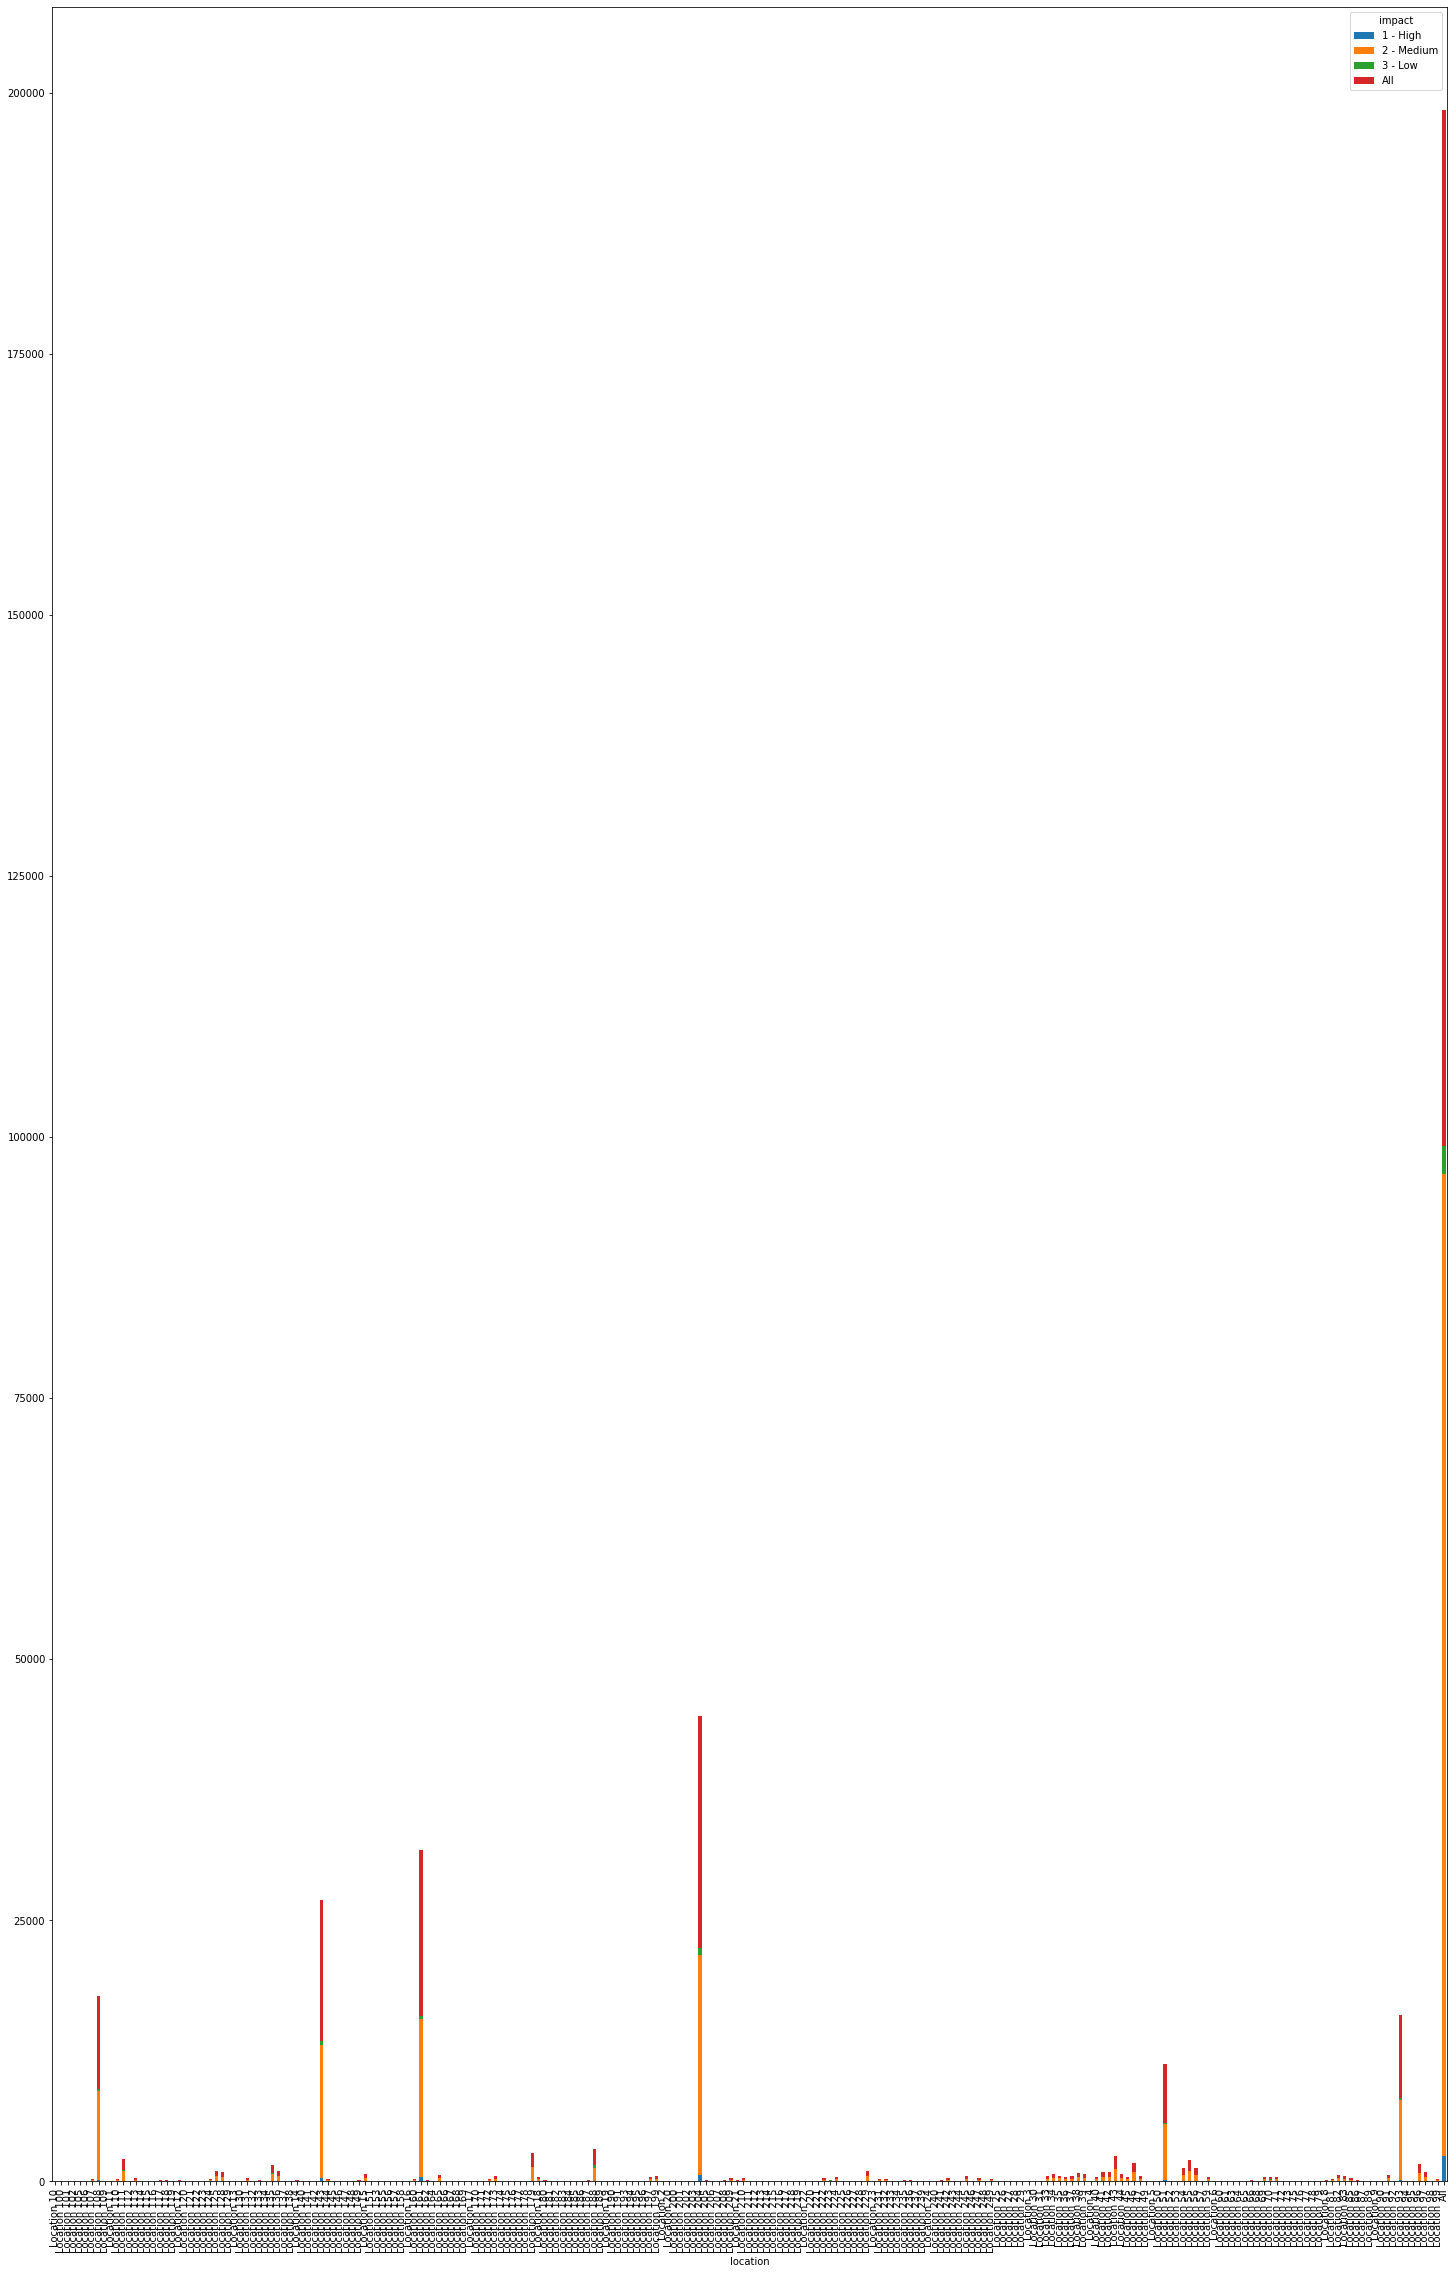

In [58]:
location.plot(kind="bar", 
                 figsize=(25,40),
                 stacked=True)

In [60]:
# symptoms of 491 are most occuring which is affecting alot
servicedataset.user_symptom.value_counts()

Symptom 491    36496
Symptom 534     3852
Symptom 387     1809
Symptom 4       1794
Symptom 116     1648
Symptom 532     1460
Symptom 571     1231
Symptom 296      976
Symptom 494      956
Symptom 506      842
Symptom 10       830
Symptom 208      781
Symptom 470      763
Symptom 118      721
Symptom 120      662
Symptom 102      617
Symptom 458      580
Symptom 87       575
Symptom 54       503
Symptom 105      488
Symptom 6        478
Symptom 127      450
Symptom 117      424
Symptom 70       408
Symptom 517      403
Symptom 592      394
Symptom 295      379
Symptom 119      367
Symptom 455      312
Symptom 471      292
               ...  
Symptom 21         1
Symptom 34         1
Symptom 89         1
Symptom 588        1
Symptom 243        1
Symptom 350        1
Symptom 498        1
Symptom 15         1
Symptom 340        1
Symptom 326        1
Symptom 189        1
Symptom 150        1
Symptom 137        1
Symptom 229        1
Symptom 385        1
Symptom 27         1
Symptom 364  

In [61]:
#support group  70 is the most effective in solving incidents raised out of all
servicedataset.Support_group.value_counts()

Group 70    30357
Group 25     5421
Group 24     4717
Group 20     4293
Group 39     3361
Group 23     2939
Group 27     2664
Group 28     2561
Group 73     2321
Group 65     2007
Group 55     1714
Group 64     1587
Group 72     1552
Group 66     1518
Group 54     1511
Group 10     1386
Group 57     1378
Group 29     1346
Group 6      1220
Group 9      1129
Group 22     1080
Group 30      848
Group 76      830
Group 33      786
Group 31      772
Group 56      747
Group 5       698
Group 69      687
Group 37      653
Group 46      571
            ...  
Group 61      132
Group 68      125
Group 60      125
Group 26      125
Group 35      113
Group 13      105
Group 67       87
Group 45       72
Group 81       61
Group 17       57
Group 14       56
Group 44       56
Group 77       51
Group 63       46
Group 2        35
Group 43       30
Group 82       29
Group 32       25
Group 78       17
Group 80       10
Group 36        9
Group 71        8
Group 18        5
Group 8         5
Group 79  

In [62]:
servicedataset.Doc_knowledge.value_counts()

False    81382
True     17816
Name: Doc_knowledge, dtype: int64

In [63]:
docimpact=pd.crosstab(servicedataset['Doc_knowledge'],servicedataset['impact'])

In [64]:
#this is contradictory to our assumtion as maximum cases are those where documents are not being taken into care
docimpact

impact,1 - High,2 - Medium,3 - Low
Doc_knowledge,,,
False,1941,77791,1650
True,503,16243,1070


In [65]:
servicedataset.confirmation_check.value_counts()

False    70526
True     28672
Name: confirmation_check, dtype: int64

In [68]:
pd.crosstab(servicedataset['confirmation_check'],servicedataset['impact'])

impact,1 - High,2 - Medium,3 - Low
confirmation_check,,,
False,1529,66912,2085
True,915,27122,635


In [48]:
servicedataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99198 entries, 0 to 99197
Data columns (total 26 columns):
Unnamed: 0            99198 non-null int64
ID                    99198 non-null object
ID_status             99198 non-null object
active                99198 non-null bool
count_reassign        99198 non-null int64
count_opening         99198 non-null int64
count_updated         99198 non-null int64
ID_caller             99198 non-null object
opened_by             99198 non-null object
opened_time           99198 non-null object
Created_by            99198 non-null object
created_at            99198 non-null object
updated_by            99198 non-null object
updated_at            99198 non-null object
type_contact          99198 non-null object
location              99198 non-null object
category_ID           99198 non-null object
user_symptom          99198 non-null object
Support_group         99198 non-null object
support_incharge      99198 non-null object
Doc_knowledge    

In [49]:
servicedataset.change_request.value_counts()

?             98512
CHG0001230       15
CHG0000132       13
CHG0000342       12
CHG0000047       12
CHG0001656       10
CHG0001398       10
CHG0001285        9
CHG0000932        9
CHG0001530        9
CHG0003516        9
CHG0003167        9
CHG0001126        9
CHG0000585        8
CHG0000959        8
CHG0000232        7
CHG0003447        7
CHG0000788        7
CHG0001002        7
CHG0000097        7
CHG0001301        7
CHG0000778        7
CHG0001943        7
CHG0000359        7
CHG0000910        7
CHG0001754        7
CHG0000775        7
CHG0000990        6
CHG0001222        6
CHG0001019        6
              ...  
CHG0000874        2
CHG0000361        2
CHG0000576        2
CHG0000704        2
CHG0001419        2
CHG0000770        2
CHG0000885        2
CHG0000355        2
CHG0001653        2
CHG0000623        2
CHG0000879        2
CHG0001210        2
CHG0001685        2
CHG0000866        2
CHG0000760        2
CHG0000332        2
CHG0000872        2
CHG0000886        2
CHG0000968        1


In [6]:
servicedataset.drop(["problem_ID","notify"],axis=1,inplace=True)

In [12]:
servicedataset.drop(["opened_time","created_at","updated_at"],axis=1,inplace=True)

In [18]:
new=servicedataset.copy()

In [19]:
cat_new=new.select_dtypes(include=object)

In [20]:
cat_new

,ID,ID_status,ID_caller,opened_by,Created_by,updated_by,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,impact
0,INC0000045,New,Caller 2403,Opened by 8,Created by 6,Updated by 21,Phone,Location 143,Category 55,Symptom 72,Group 56,NaN,2 - Medium
1,INC0000045,Resolved,Caller 2403,Opened by 8,Created by 6,Updated by 804,Phone,Location 143,Category 55,Symptom 72,Group 56,NaN,2 - Medium
2,INC0000045,Closed,Caller 2403,Opened by 8,Created by 6,Updated by 908,Phone,Location 143,Category 55,Symptom 72,Group 56,NaN,2 - Medium
3,INC0000047,Active,Caller 2403,Opened by 397,Created by 171,Updated by 21,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,2 - Medium
4,INC0000047,Active,Caller 2403,Opened by 397,Created by 171,Updated by 21,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,2 - Medium
5,INC0000047,Active,Caller 2403,Opened by 397,Created by 171,Updated by 703,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,2 - Medium
6,INC0000047,Active,Caller 2403,Opened by 397,Created by 171,Updated by 332,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,2 - Medium
7,INC0000047,Awaiting User Info,Caller 2403,Opened by 397,Created by 171,Updated by 332,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,2 - Medium
8,INC0000047,Closed,Caller 2403,Opened by 397,Created by 171,Updated by 908,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,2 - Medium
9,INC0000057,New,Caller 4416,Opened by 8,NaN,Updated by 21,Phone,Location 204,Category 20,Symptom 471,Group 70,NaN,2 - Medium


In [11]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


In [21]:
from dython.nominal import associations

In [10]:
from dython._private import convert,remove_incomplete_samples,replace_nan_with_value

In [11]:
from dython.nominal import cramers_v,theils_u,conditional_entropy,correlation_ratio

C:\Users\sedulous\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


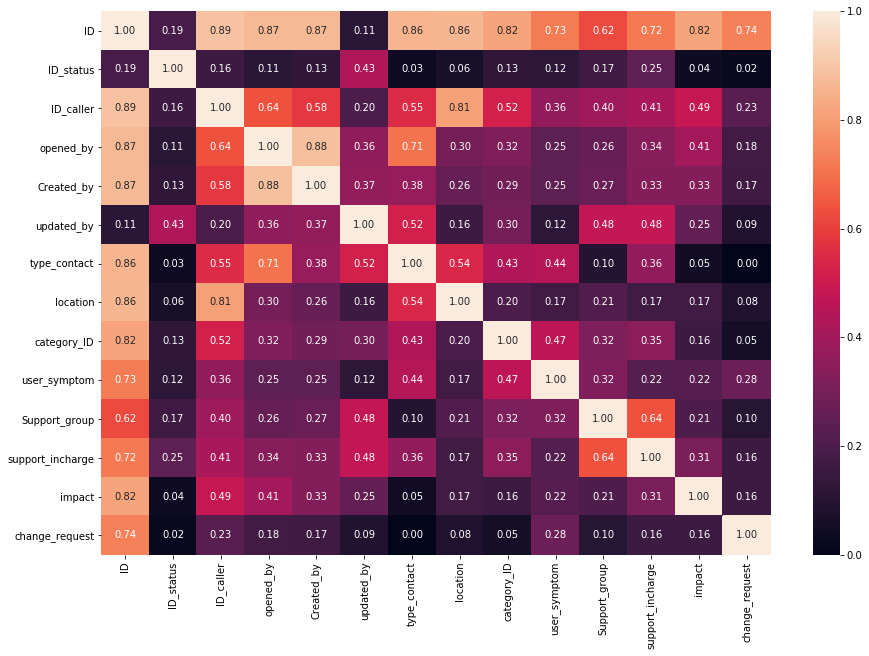

In [16]:
associations(cat_new,nominal_columns='all', figsize=[15,10])

In [25]:
new.drop(['Unnamed: 0'],axis=1,inplace=True)

In [26]:
new

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,type_contact,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,Created by 6,Updated by 21,Phone,Category 55,Symptom 72,Group 56,NaN,True,False,2 - Medium
1,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,Created by 6,Updated by 804,Phone,Category 55,Symptom 72,Group 56,NaN,True,False,2 - Medium
2,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,Created by 6,Updated by 908,Phone,Category 55,Symptom 72,Group 56,NaN,True,False,2 - Medium
3,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,Created by 171,Updated by 21,Phone,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium
4,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,Created by 171,Updated by 21,Phone,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium
5,INC0000047,Active,True,1,0,4,Caller 2403,Opened by 397,Created by 171,Updated by 703,Phone,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium
6,INC0000047,Active,True,1,0,5,Caller 2403,Opened by 397,Created by 171,Updated by 332,Phone,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium
7,INC0000047,Awaiting User Info,True,1,0,6,Caller 2403,Opened by 397,Created by 171,Updated by 332,Phone,Category 40,Symptom 471,Group 24,Resolver 89,True,False,2 - Medium
8,INC0000047,Closed,False,1,0,8,Caller 2403,Opened by 397,Created by 171,Updated by 908,Phone,Category 40,Symptom 471,Group 24,Resolver 89,True,False,2 - Medium
9,INC0000057,New,True,0,0,0,Caller 4416,Opened by 8,NaN,Updated by 21,Phone,Category 20,Symptom 471,Group 70,NaN,True,False,2 - Medium


In [51]:































































































servicedataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99198 entries, 0 to 99197
Data columns (total 24 columns):
Unnamed: 0            99198 non-null int64
ID                    99198 non-null object
ID_status             99198 non-null object
active                99198 non-null bool
count_reassign        99198 non-null int64
count_opening         99198 non-null int64
count_updated         99198 non-null int64
ID_caller             99198 non-null object
opened_by             99198 non-null object
opened_time           99198 non-null object
Created_by            99198 non-null object
created_at            99198 non-null object
updated_by            99198 non-null object
updated_at            99198 non-null object
type_contact          99198 non-null object
location              99198 non-null object
category_ID           99198 non-null object
user_symptom          99198 non-null object
Support_group         99198 non-null object
support_incharge      99198 non-null object
Doc_knowledge    

In [52]:
servicedataset.head(10)

,Unnamed: 0,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,...,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,change_request,impact
0,1,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,...,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,?,2 - Medium
1,3,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,...,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,?,2 - Medium
2,4,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,...,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,?,2 - Medium
3,6,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,...,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,?,2 - Medium
4,7,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,...,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,?,2 - Medium
5,9,INC0000047,Active,True,1,0,4,Caller 2403,Opened by 397,29-02-2016 04:40,...,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,?,2 - Medium
6,10,INC0000047,Active,True,1,0,5,Caller 2403,Opened by 397,29-02-2016 04:40,...,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,?,2 - Medium
7,11,INC0000047,Awaiting User Info,True,1,0,6,Caller 2403,Opened by 397,29-02-2016 04:40,...,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,True,False,?,2 - Medium
8,13,INC0000047,Closed,False,1,0,8,Caller 2403,Opened by 397,29-02-2016 04:40,...,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,True,False,?,2 - Medium
9,14,INC0000057,New,True,0,0,0,Caller 4416,Opened by 8,29-02-2016 06:10,...,Phone,Location 204,Category 20,Symptom 471,Group 70,?,True,False,?,2 - Medium


In [53]:
servicedataset.support_incharge.value_counts()

?               19302
Resolver 17      7511
Resolver 13      6135
Resolver 194     2492
Resolver 57      2196
Resolver 69      2091
Resolver 33      1761
Resolver 115     1546
Resolver 24      1524
Resolver 249     1482
Resolver 215     1475
Resolver 78      1426
Resolver 140     1379
Resolver 31      1362
Resolver 236     1306
Resolver 125     1237
Resolver 183     1093
Resolver 73      1092
Resolver 198     1062
Resolver 94      1060
Resolver 34      1023
Resolver 253      907
Resolver 170      861
Resolver 126      852
Resolver 28       848
Resolver 229      800
Resolver 227      778
Resolver 149      762
Resolver 176      761
Resolver 153      744
                ...  
Resolver 104        5
Resolver 5          5
Resolver 221        5
Resolver 87         4
Resolver 238        4
Resolver 179        4
Resolver 222        4
Resolver 122        4
Resolver 85         4
Resolver 105        4
Resolver 166        4
Resolver 243        3
Resolver 202        3
Resolver 204        3
Resolver 6

In [54]:
servicedataset.change_request.value_counts()

?             98512
CHG0001230       15
CHG0000132       13
CHG0000342       12
CHG0000047       12
CHG0001656       10
CHG0001398       10
CHG0001285        9
CHG0000932        9
CHG0001530        9
CHG0003516        9
CHG0003167        9
CHG0001126        9
CHG0000585        8
CHG0000959        8
CHG0000232        7
CHG0003447        7
CHG0000788        7
CHG0001002        7
CHG0000097        7
CHG0001301        7
CHG0000778        7
CHG0001943        7
CHG0000359        7
CHG0000910        7
CHG0001754        7
CHG0000775        7
CHG0000990        6
CHG0001222        6
CHG0001019        6
              ...  
CHG0000874        2
CHG0000361        2
CHG0000576        2
CHG0000704        2
CHG0001419        2
CHG0000770        2
CHG0000885        2
CHG0000355        2
CHG0001653        2
CHG0000623        2
CHG0000879        2
CHG0001210        2
CHG0001685        2
CHG0000866        2
CHG0000760        2
CHG0000332        2
CHG0000872        2
CHG0000886        2
CHG0000968        1


In [55]:
servicedataset.drop(['change_request','Unnamed: 0'],axis=1,inplace=True)

In [56]:
servicedataset.columns

Index(['ID', 'ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'ID_caller', 'opened_by', 'opened_time', 'Created_by',
       'created_at', 'updated_by', 'updated_at', 'type_contact', 'location',
       'category_ID', 'user_symptom', 'Support_group', 'support_incharge',
       'Doc_knowledge', 'confirmation_check', 'impact'],
      dtype='object')

In [57]:
cat_order=['3 - Low','2 - Medium','1 - High']

In [58]:
servicedataset['impact']=servicedataset.impact.astype("category",ordered=True,categories=cat_order).cat.codes

C:\Users\sedulous\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [59]:
servicedataset.head(3)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1
1,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,29-02-2016 11:29,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1
2,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,05-03-2016 12:00,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1


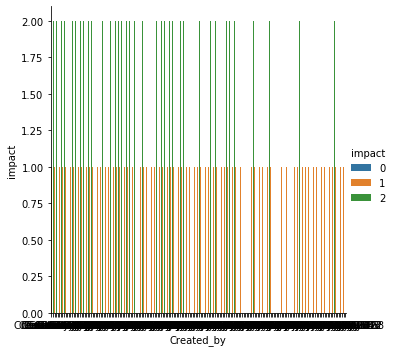

In [60]:
sns.catplot(x="Created_by", y="impact", hue="impact", kind="bar", data=servicedataset);

In [61]:
servicedataset.ID_caller.value_counts().to_dict()


{'Caller 1904': 1001,
 'Caller 290': 552,
 'Caller 4514': 496,
 'Caller 1441': 218,
 'Caller 298': 203,
 'Caller 3763': 192,
 'Caller 4414': 167,
 'Caller 93': 166,
 'Caller 90': 158,
 'Caller 2471': 155,
 'Caller 1531': 153,
 'Caller 3160': 151,
 'Caller 5093': 149,
 'Caller 3479': 149,
 'Caller 363': 144,
 'Caller 1270': 140,
 'Caller 707': 139,
 'Caller 1517': 138,
 'Caller 994': 136,
 'Caller 3038': 134,
 'Caller 3870': 133,
 'Caller 501': 132,
 'Caller 2079': 130,
 'Caller 2737': 128,
 'Caller 2630': 125,
 'Caller 4642': 125,
 'Caller 3986': 124,
 'Caller 2522': 123,
 'Caller 1325': 123,
 'Caller 4288': 123,
 'Caller 1353': 123,
 'Caller 156': 123,
 'Caller 4180': 121,
 'Caller 723': 121,
 'Caller 203': 120,
 'Caller 4166': 120,
 'Caller 3853': 120,
 'Caller 4808': 119,
 'Caller 742': 118,
 'Caller 1129': 118,
 'Caller 944': 117,
 'Caller 2001': 116,
 'Caller 4893': 116,
 'Caller 3247': 116,
 'Caller 1519': 115,
 'Caller 5422': 115,
 'Caller 1658': 114,
 'Caller 5317': 114,
 'Call

In [62]:
servicedataset_frequency_map = servicedataset.ID_caller.value_counts().to_dict()


In [63]:
servicedataset.ID_caller = servicedataset.ID_caller.map(servicedataset_frequency_map)

In [64]:
servicedataset.ID_caller.value_counts()

19     2052
13     1989
20     1960
18     1890
15     1860
12     1752
10     1730
17     1717
31     1705
14     1666
8      1608
24     1608
9      1602
21     1596
11     1584
16     1568
22     1540
7      1519
29     1508
23     1472
6      1416
28     1400
5      1395
25     1375
37     1369
35     1365
34     1326
27     1323
30     1320
41     1230
       ... 
1       181
88      176
167     167
166     166
158     158
155     155
153     153
151     151
144     144
140     140
139     139
138     138
136     136
134     134
133     133
132     132
130     130
128     128
124     124
119     119
117     117
113     113
110     110
107     107
106     106
105     105
100     100
99       99
94       94
81       81
Name: ID_caller, Length: 145, dtype: int64

In [65]:
servicedataset.head(5)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact
0,INC0000045,New,True,0,0,0,60,Opened by 8,29-02-2016 01:16,Created by 6,...,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1
1,INC0000045,Resolved,True,0,0,3,60,Opened by 8,29-02-2016 01:16,Created by 6,...,29-02-2016 11:29,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1
2,INC0000045,Closed,False,0,0,4,60,Opened by 8,29-02-2016 01:16,Created by 6,...,05-03-2016 12:00,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1
3,INC0000047,Active,True,1,0,1,60,Opened by 397,29-02-2016 04:40,Created by 171,...,29-02-2016 05:30,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,1
4,INC0000047,Active,True,1,0,2,60,Opened by 397,29-02-2016 04:40,Created by 171,...,29-02-2016 05:33,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,1


In [66]:
servicedatasetopened_frequency_map = servicedataset.opened_by.value_counts().to_dict()

In [67]:
servicedataset.opened_by = servicedataset.opened_by.map(servicedatasetopened_frequency_map)

In [68]:
servicedataset.drop(['Created_by'],axis=1,inplace=True)

In [69]:
servicedataset.head(5)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,created_at,...,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact
0,INC0000045,New,True,0,0,0,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1
1,INC0000045,Resolved,True,0,0,3,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,29-02-2016 11:29,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1
2,INC0000045,Closed,False,0,0,4,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,05-03-2016 12:00,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1
3,INC0000047,Active,True,1,0,1,60,2501,29-02-2016 04:40,29-02-2016 04:57,...,29-02-2016 05:30,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,1
4,INC0000047,Active,True,1,0,2,60,2501,29-02-2016 04:40,29-02-2016 04:57,...,29-02-2016 05:33,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,1


In [70]:
servicedataset.updated_by.value_counts

<bound method IndexOpsMixin.value_counts of 0         Updated by 21
1        Updated by 804
2        Updated by 908
3         Updated by 21
4         Updated by 21
5        Updated by 703
6        Updated by 332
7        Updated by 332
8        Updated by 908
9         Updated by 21
10        Updated by 21
11       Updated by 451
12        Updated by 21
13        Updated by 21
14       Updated by 908
15       Updated by 340
16       Updated by 465
17       Updated by 465
18       Updated by 908
19       Updated by 340
20       Updated by 340
21       Updated by 340
22       Updated by 804
23       Updated by 241
24       Updated by 908
25       Updated by 340
26        Updated by 60
27        Updated by 60
28       Updated by 241
29       Updated by 241
              ...      
99168    Updated by 908
99169    Updated by 908
99170    Updated by 796
99171     Updated by 27
99172    Updated by 699
99173    Updated by 907
99174    Updated by 931
99175    Updated by 931
99176    Updated by 

In [71]:
servicedataset.head(3)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,created_at,...,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact
0,INC0000045,New,True,0,0,0,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1
1,INC0000045,Resolved,True,0,0,3,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,29-02-2016 11:29,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1
2,INC0000045,Closed,False,0,0,4,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,05-03-2016 12:00,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1


In [72]:
servicedatasettype_frequency_map = servicedataset.type_contact.value_counts().to_dict()

In [73]:
servicedataset.type_contact = servicedataset.type_contact.map(servicedatasettype_frequency_map)

In [74]:
servicedataset.head(3)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,created_at,...,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact
0,INC0000045,New,True,0,0,0,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,29-02-2016 01:23,98306,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1
1,INC0000045,Resolved,True,0,0,3,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,29-02-2016 11:29,98306,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1
2,INC0000045,Closed,False,0,0,4,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,05-03-2016 12:00,98306,Location 143,Category 55,Symptom 72,Group 56,?,True,False,1


In [76]:
servicedataset.location = servicedataset.location.map(servicedatasetlocation_frequency_map)

In [77]:
servicedataset.category_ID.value_counts()

Category 26    12937
Category 53    11282
Category 42    11130
Category 46     9268
Category 23     5505
Category 9      5182
Category 32     5065
Category 37     4629
Category 57     4527
Category 20     3863
Category 61     3652
Category 24     3147
Category 34     2778
Category 40     2634
Category 45     2527
Category 51     1674
Category 28     1584
Category 35     1408
Category 44     1249
Category 19     1095
Category 13      695
Category 43      601
Category 55      568
Category 17      351
Category 22      285
Category 56      224
Category 38      199
Category 8       175
Category 7       143
Category 54      108
Category 33      102
Category 31       69
Category 50       69
Category 2        58
?                 56
Category 63       54
Category 21       52
Category 47       30
Category 59       29
Category 41       26
Category 5        23
Category 29       22
Category 10       21
Category 25       18
Category 62       17
Category 52       14
Category 4        14
Category 48  

In [78]:
servicedataset.head(5)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,created_at,...,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact
0,INC0000045,New,True,0,0,0,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,29-02-2016 01:23,98306,13463,Category 55,Symptom 72,Group 56,?,True,False,1
1,INC0000045,Resolved,True,0,0,3,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,29-02-2016 11:29,98306,13463,Category 55,Symptom 72,Group 56,?,True,False,1
2,INC0000045,Closed,False,0,0,4,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,05-03-2016 12:00,98306,13463,Category 55,Symptom 72,Group 56,?,True,False,1
3,INC0000047,Active,True,1,0,1,60,2501,29-02-2016 04:40,29-02-2016 04:57,...,29-02-2016 05:30,98306,285,Category 40,Symptom 471,Group 24,Resolver 31,True,False,1
4,INC0000047,Active,True,1,0,2,60,2501,29-02-2016 04:40,29-02-2016 04:57,...,29-02-2016 05:33,98306,285,Category 40,Symptom 471,Group 24,Resolver 31,True,False,1


In [79]:
def score_to_numeric(x):
    if x=='True':
        return 1
    else:
        return 0

In [80]:
servicedataset['Doc_knowledge'] = servicedataset['Doc_knowledge'].apply(score_to_numeric)

In [81]:
servicedataset['confirmation_check'] = servicedataset['confirmation_check'].apply(score_to_numeric)

In [82]:
servicedataset['active'] = servicedataset['active'].apply(score_to_numeric)

In [83]:
servicedataset.head(5)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,created_at,...,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact
0,INC0000045,New,0,0,0,0,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,29-02-2016 01:23,98306,13463,Category 55,Symptom 72,Group 56,?,0,0,1
1,INC0000045,Resolved,0,0,0,3,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,29-02-2016 11:29,98306,13463,Category 55,Symptom 72,Group 56,?,0,0,1
2,INC0000045,Closed,0,0,0,4,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,05-03-2016 12:00,98306,13463,Category 55,Symptom 72,Group 56,?,0,0,1
3,INC0000047,Active,0,1,0,1,60,2501,29-02-2016 04:40,29-02-2016 04:57,...,29-02-2016 05:30,98306,285,Category 40,Symptom 471,Group 24,Resolver 31,0,0,1
4,INC0000047,Active,0,1,0,2,60,2501,29-02-2016 04:40,29-02-2016 04:57,...,29-02-2016 05:33,98306,285,Category 40,Symptom 471,Group 24,Resolver 31,0,0,1


In [84]:
#servicedatasetupdated_by_frequency_map = servicedataset.updated_by.value_counts().to_dict()


In [85]:
#servicedataset.updated_by = servicedataset.updated_by.map(servicedatasetupdated_by_frequency_map)

In [86]:
#servicedataset.head(5)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,created_at,...,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact
0,INC0000045,New,0,0,0,0,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,29-02-2016 01:23,98306,13463,Category 55,Symptom 72,Group 56,?,0,0,1
1,INC0000045,Resolved,0,0,0,3,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,29-02-2016 11:29,98306,13463,Category 55,Symptom 72,Group 56,?,0,0,1
2,INC0000045,Closed,0,0,0,4,60,2910,29-02-2016 01:16,29-02-2016 01:23,...,05-03-2016 12:00,98306,13463,Category 55,Symptom 72,Group 56,?,0,0,1
3,INC0000047,Active,0,1,0,1,60,2501,29-02-2016 04:40,29-02-2016 04:57,...,29-02-2016 05:30,98306,285,Category 40,Symptom 471,Group 24,Resolver 31,0,0,1
4,INC0000047,Active,0,1,0,2,60,2501,29-02-2016 04:40,29-02-2016 04:57,...,29-02-2016 05:33,98306,285,Category 40,Symptom 471,Group 24,Resolver 31,0,0,1


In [87]:
#df_cat.head(10)

,ID,ID_status,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,impact,notify,problem_ID,change_request
0,INC0000045,New,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 21,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,?,2 - Medium,Do Not Notify,?,?
1,INC0000045,Resolved,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 804,29-02-2016 11:29,Phone,Location 143,Category 55,Symptom 72,Group 56,?,2 - Medium,Do Not Notify,?,?
2,INC0000045,Closed,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 908,05-03-2016 12:00,Phone,Location 143,Category 55,Symptom 72,Group 56,?,2 - Medium,Do Not Notify,?,?
3,INC0000047,Active,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 21,29-02-2016 05:30,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,2 - Medium,Do Not Notify,?,?
4,INC0000047,Active,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 21,29-02-2016 05:33,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,2 - Medium,Do Not Notify,?,?
5,INC0000047,Active,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 703,29-02-2016 11:32,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,2 - Medium,Do Not Notify,?,?
6,INC0000047,Active,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 332,01-03-2016 09:14,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,2 - Medium,Do Not Notify,?,?
7,INC0000047,Awaiting User Info,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 332,01-03-2016 09:14,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,2 - Medium,Do Not Notify,?,?
8,INC0000047,Closed,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 908,06-03-2016 10:00,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,2 - Medium,Do Not Notify,?,?
9,INC0000057,New,Caller 4416,Opened by 8,29-02-2016 06:10,?,?,Updated by 21,29-02-2016 06:26,Phone,Location 204,Category 20,Symptom 471,Group 70,?,2 - Medium,Do Not Notify,?,?


In [72]:
#import scipy.stats as ss

In [73]:
# def cramers_v(confusion_matrix):
    
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum()
#     phi2 = chi2 / n
#     r, k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
#     rcorr = r - ((r-1)**2)/(n-1)
#     kcorr = k - ((k-1)**2)/(n-1) 
#     return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))




In [74]:

confusion_matrix = pd.crosstab(servicedataset["ID_status"], servicedataset["impact"]).as_matrix()
cramers_v(confusion_matrix)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.03864157129498504

In [75]:
confusion_matrix = pd.crosstab(df_cat["ID"], df_cat["impact"]).as_matrix()
cramers_v(confusion_matrix)

NameError: name 'df_cat' is not defined

In [92]:
confusion_matrix = pd.crosstab(df_cat["Support_group"], df_cat["impact"]).as_matrix()
cramers_v(confusion_matrix)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.20633012297251282

In [93]:
confusion_matrix = pd.crosstab(df_cat["ID_caller"], df_cat["impact"]).as_matrix()
cramers_v(confusion_matrix)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.4878879927775343

In [94]:
confusion_matrix = pd.crosstab(df_cat["Created_by"], df_cat["impact"]).as_matrix()
cramers_v(confusion_matrix)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.3336976835383359

In [95]:
confusion_matrix = pd.crosstab(df_cat["type_contact"], df_cat["impact"]).as_matrix()
cramers_v(confusion_matrix)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.04569937402206483

In [96]:
confusion_matrix = pd.crosstab(df_cat["location"], df_cat["impact"]).as_matrix()
cramers_v(confusion_matrix)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.1717124435537777

In [97]:
confusion_matrix = pd.crosstab(df_cat["category_ID"], df_cat["impact"]).as_matrix()
cramers_v(confusion_matrix)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.16200812186300595

In [98]:
confusion_matrix = pd.crosstab(df_cat["user_symptom"], df_cat["impact"]).as_matrix()
cramers_v(confusion_matrix)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.22401601913769942

In [99]:
confusion_matrix = pd.crosstab(df_cat["Support_group"], df_cat["impact"]).as_matrix()
cramers_v(confusion_matrix)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.20633012297251282

In [100]:
confusion_matrix = pd.crosstab(df_cat["Support_group"], df_cat["user_symptom"]).as_matrix()
cramers_v(confusion_matrix)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.3208014406602499

In [102]:
confusion_matrix = pd.crosstab(df_cat["opened_by"], df_cat["impact"]).as_matrix()
cramers_v(confusion_matrix)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.4093452383509906

In [104]:
confusion_matrix = pd.crosstab(df_cat["updated_by"], df_cat["impact"]).as_matrix()
cramers_v(confusion_matrix)


C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.2541540977971355

In [105]:
copy=pd.read_csv("E:\\Excel R\\Project Servicenow\\train.csv\\train.csv")

In [106]:
copy.head(3)

,Unnamed: 0,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,...,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,1,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
1,3,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
2,4,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
